# Author : Babu Balasubramanian

## EDA with Netflix Dataset

###### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random
from PIL import Image
import plotly.express as px
import plotly.graph_objects as go

###### Import Data

In [2]:
df = pd.read_csv(r'https://github.com/Babu1107/EDA-with-Netflix-Dataset/blob/main/netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
df.shape

(8807, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing =percent_missing.round(2)
missing_count = df.isnull().sum()
missing_value_df = pd.DataFrame({'missing count': missing_count,
                                 'percent_missing': percent_missing})
final=missing_value_df.sort_values(by = 'missing count' , ascending = False).reset_index().rename(columns = {'index':'column_name'})


In [8]:
final

,column_name,missing count,percent_missing
0,director,2634,29.91
1,country,831,9.44
2,cast,825,9.37
3,date_added,10,0.11
4,rating,4,0.05
5,duration,3,0.03
6,show_id,0,0.00
7,type,0,0.00
8,title,0,0.00
9,release_year,0,0.00


In [9]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [10]:
df['rating'] = df['rating'].replace({
    '66 min' : 'TV-MA', 
    '74 min' : 'TV-MA', 
    '84 min' : 'TV-MA', 
    'TV-Y7-FV' : 'TV-Y7' })


In [11]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', nan, 'UR'], dtype=object)

In [12]:
df['rating'] =df['rating'].replace({
    'PG-13' : 'Suitable for ages 12 and up',
    'TV-MA' : 'Adults',
    'PG'    : 'Parental Guidance suggested',
    'TV-14' : 'Suitable for ages 14 and up',
    'TV-PG' : 'Parental Guidance suggested',
    'TV-Y'  : 'Kids',
    'TV-Y7' : 'Suitable for ages 7 and up',
    'R'     : 'Adults',
    'TV-G'  : 'Kids',
    'G'     : 'Kids',
    'NC-17' : 'Adults'
})

In [13]:
df['rating'].unique()

array(['Suitable for ages 12 and up', 'Adults',
       'Parental Guidance suggested', 'Suitable for ages 14 and up',
       'Kids', 'Suitable for ages 7 and up', 'NR', nan, 'UR'],
      dtype=object)

In [16]:
df.groupby('country')['country'].count().sort_values(ascending=False)

country
United States                                                                          2818
India                                                                                   972
United Kingdom                                                                          419
Japan                                                                                   245
South Korea                                                                             199
                                                                                       ... 
Ireland, Canada, Luxembourg, United States, United Kingdom, Philippines, India            1
Ireland, Canada, United Kingdom, United States                                            1
Ireland, Canada, United States, United Kingdom                                            1
Ireland, France, Iceland, United States, Mexico, Belgium, United Kingdom, Hong Kong       1
Zimbabwe                                                                

In [17]:
df['country']=df['country'].fillna(df['country'].mode()[0])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [291]:
df['cast'].replace(np.nan, 'No Data', inplace =True)
df['director'].replace(np.nan, 'No Data', inplace = True)
df.dropna(inplace =True)
df.drop_duplicates(inplace =True)

In [293]:
df['date_added'] = pd.to_datetime(df['date_added'])

###### ANALYSIS:

In [294]:
tot_count= df.groupby(['show_id'])['show_id'].count().sum()
tot_count

fig8 = go.Figure()
fig8.add_trace(go.Indicator( value = tot_count))

fig8 = fig8.update_layout(
        template = { 'data' : {'indicator': [{
        'title': {'text': 'Total Content on Netflix'} ,}] 
                   }})
fig8.update_layout(margin=dict(l=50, r=50, b=0, t=30), showlegend=False,

plot_bgcolor='#333', paper_bgcolor='#333', title_x = 0.5,

title_font=dict(size=25, color='#D81F26', family="Lato, sans-serif",
         ),

font=dict(size=45, color='#D81F26'),

hoverlabel=dict(bgcolor="#444", font_size=45,

font_family="Lato, sans-serif"))

fig8.show()

In [295]:

x=df["type"].value_counts().reset_index()

fig_donut1 = px.pie(x, names='index',  values="type", 

color_discrete_sequence=['#D81F26', '#FC757A'])

fig_donut1.update_traces(hovertemplate=None, textposition='outside',

textinfo='percent+label', rotation=180)

fig_donut1.update_layout(margin=dict(t=60, b=30, l=0, r=0), showlegend=True,

plot_bgcolor='#333', paper_bgcolor='#333', title_text='Type of Content Uploaded More on Netflix',title_x=0.5,

title_font=dict(size=25, color='#e6e6e6', family="Lato, sans-serif"),

font=dict(size=17, color='#8a8d93'),

hoverlabel=dict(bgcolor="#444", font_size=13,

font_family="Lato, sans-serif"))

In [310]:
mcm = df.groupby(['rating'])['title'].count().reset_index().sort_values('title', ascending = False)
y=mcm['title']
x=mcm['rating']

fig50=px.bar(mcm,x=x,y=y, template = "plotly_dark")
fig50.update_traces(marker_color='#D81F26')
fig50.update_layout(margin=dict(t=45, b=30, l=0, r=0), showlegend=False,

plot_bgcolor='#333', paper_bgcolor='#333',title_text='Category Which Has Uploaded More Content', title_x = 0.5,

title_font=dict(size=25, color='#e6e6e6', family="Lato, sans-serif",
         ),

font=dict(size=17, color='#8a8d93'),

hoverlabel=dict(bgcolor="#444", font_size=13,

font_family="Lato, sans-serif"))


fig50.show()



In [301]:
df_5 = df.query('release_year >= 2007')
df_5 = df_5.groupby(['release_year'])['show_id'].count().reset_index()
fig10 = px.area(df_5, x = 'release_year', y ='show_id', template = "plotly_dark" )

fig10.update_layout(margin=dict(t=60, b=30, l=0, r=0), showlegend=False,

plot_bgcolor='#333', paper_bgcolor='#333',title_text='Over All Content Release Trend', title_x = 0.5,

title_font=dict(size=25, color='#e6e6e6', family="Lato, sans-serif",
         ),

font=dict(size=17, color='#8a8d93'),

hoverlabel=dict(bgcolor="#444", font_size=13,

font_family="Lato, sans-serif"))

fig10.show()


In [308]:
df_9 = df.query("type == 'TV Show'")
df_9 = df_9[['title', 'duration']]
df_9 = df_9.groupby(['duration'])['title'].count().reset_index().sort_values('title', ascending = False)
df_9 = df_9.rename(columns = {"title" : "TV Shows" , "duration" : "Seasons"})
df_9

fig10 = px.histogram(
    df_9,
    x="Seasons",
    y="TV Shows",
    barmode="overlay",
    template = "plotly_dark",
    color_discrete_sequence=['indianred'],
)


fig10.update_layout(margin=dict(t=60, b=30, l=0, r=0), showlegend=False,

plot_bgcolor='#333', paper_bgcolor='#333',title_text='TV Shows Seasons', title_x = 0.5,

title_font=dict(size=25, color='#e6e6e6', family="Lato, sans-serif",
         ),

font=dict(size=17, color='#8a8d93'),

hoverlabel=dict(bgcolor="#444", font_size=13,

font_family="Lato, sans-serif"))

fig10.show()


In [265]:
df_4 =df.query('release_year >= 2007')
df_4= df_4.groupby(['type', 'release_year'])['show_id'].count().reset_index()
df_4_movie = df_4.query("type == 'Movie'")
df_4_tvshow = df_4.query("type == 'TV Show'")
mshowid = df_4_movie['show_id']
tvshowid = df_4_tvshow['show_id']
releaseyear = df_4_tvshow['release_year']

fig11 = go.Figure(data=[
    go.Bar(name='Movie', x=releaseyear, y=mshowid),
    go.Bar(name='TV Show', x=releaseyear, y=tvshowid)
])

fig11.update_layout(margin=dict(t=60, b=30, l=0, r=0), showlegend=False,template = "plotly_dark",

plot_bgcolor='#333', paper_bgcolor='#333',title_text='Content Added Over Years', title_x = 0.5,

title_font=dict(size=25, color='#e6e6e6', family="Lato, sans-serif", 
         ),

font=dict(size=17, color='#8a8d93'),

hoverlabel=dict(bgcolor="#444", font_size=13,

font_family="Lato, sans-serif"))

fig11.show()

In [312]:
filtered_directors=df[df["type"] == "Movie"]
filtered_directors=filtered_directors[filtered_directors["country"] == "India"]
filtered_directors=filtered_directors['director'].str.split(',',expand=True).stack()
filtered_directors=filtered_directors.to_frame()
filtered_directors.columns=['Director']
directors=filtered_directors.groupby(['Director']).size().reset_index(name='Total Content')
directors=directors[directors.Director !='No Data']
directors=directors.sort_values(by=['Total Content'],ascending=False)
directorsTop10=directors.head(10)
directorsTop10=directorsTop10.sort_values(by=['Total Content'])
fig0=px.bar(directorsTop10,x='Total Content',y='Director', template = "plotly_dark" )

fig0.update_layout(margin=dict(t=60, b=30, l=0, r=0), showlegend=False,

plot_bgcolor='#333', paper_bgcolor='#333',title_text='Top 10 Movie Directors From India With Most Content', title_x = 0.5,

title_font=dict(size=25, color='#e6e6e6', family="Lato, sans-serif",
         ),

font=dict(size=17, color='#8a8d93'),

hoverlabel=dict(bgcolor="#444", font_size=13,

font_family="Lato, sans-serif"))


fig0.show()


In [314]:
filtered_directors=df[df["type"] == "Movie"]
filtered_directors=filtered_directors[filtered_directors["country"] == "United States"]
filtered_directors=filtered_directors['director'].str.split(',',expand=True).stack()
filtered_directors=filtered_directors.to_frame()
filtered_directors.columns=['Director']
directors=filtered_directors.groupby(['Director']).size().reset_index(name='Total Content')
directors=directors[directors.Director !='No Data']
directors=directors.sort_values(by=['Total Content'],ascending=False)
directorsTop10=directors.head(10)
directorsTop10=directorsTop10.sort_values(by=['Total Content'])
fig1=px.bar(directorsTop10,x='Total Content',y='Director',template = "plotly_dark")


fig1.update_layout(margin=dict(t=60, b=30, l=0, r=0), showlegend=False, 

plot_bgcolor='#333', paper_bgcolor='#333',title_text='Top 10 Movie Directors From US With Most Content', title_x = 0.5,

title_font=dict(size=25, color='#e6e6e6', family="Lato, sans-serif",
         ),

font=dict(size=17, color='#8a8d93'),

hoverlabel=dict(bgcolor="#444", font_size=13,

font_family="Lato, sans-serif"))
                   
                   
                   
fig1.show()

In [319]:
filtered_cast=df[df["type"] == "Movie"]
filtered_cast=filtered_cast[filtered_cast["country"] == "India"]
#filtered_cast=pd.DataFrame()
filtered_cast=df['cast'].str.split(',',expand=True).stack()
filtered_cast=filtered_cast.to_frame()
filtered_cast.columns=['Actor']
actors=filtered_cast.groupby(['Actor']).size().reset_index(name='Total Content')
actors=actors[actors.Actor !='No Data']
actors=actors.sort_values(by=['Total Content'],ascending=False)
actorsTop10=actors.head(10)
actorsTop10=actorsTop10.sort_values(by=['Total Content'])
fig2=px.bar(actorsTop10,x='Total Content',y='Actor', template = "plotly_dark" )

fig2.update_layout(margin=dict(t=60, b=30, l=0, r=0), showlegend=False,

plot_bgcolor='#333', paper_bgcolor='#333',title_text='Top 10 Actors From India On Netflix',title_x=0.5,

title_font=dict(size=25, color='#e6e6e6', family="Lato, sans-serif",
         ),

font=dict(size=17, color='#8a8d93'),

hoverlabel=dict(bgcolor="#444", font_size=13,

font_family="Lato, sans-serif"))


fig2.show()

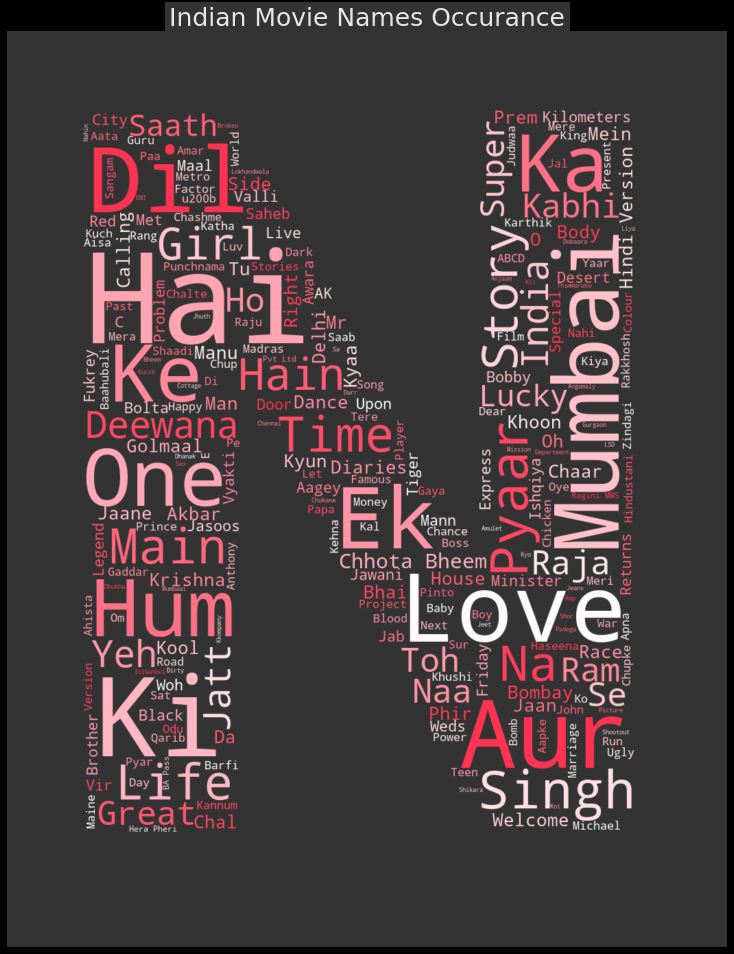

In [290]:
def red_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(351, 99%%, %s%%)" % random.randint(60, 100)

imovies=df[df["type"] == "Movie"]
imovies=imovies[imovies["country"] == "India"]
imovies=imovies["title"]
text = str(list(imovies)).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
mask = np.array(Image.open(r'C:\Users\dell\Desktop\mask.png'))
wordcloud = WordCloud(background_color = '#333',  height = 200, max_words = 250, mask = mask).generate(text)
plt.figure( figsize=(10,50))
plt.imshow(wordcloud.recolor(color_func=red_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Indian Movie Names Occurance", size=25, color='#e6e6e6', family="Lato, sans-serif",  backgroundcolor= '#333')
plt.show()


In [320]:
fig_donut = px.pie(df, names='type',  hole=0.7,

color_discrete_sequence=['#D81F26', '#221f1f'])

fig_donut.update_traces(hovertemplate=None, textposition='outside',

textinfo='percent+label', rotation=90)

fig_donut.update_layout(margin=dict(t=60, b=30, l=0, r=0), showlegend=True,

plot_bgcolor='#333', paper_bgcolor='#333', title_text='Type of Content Uploaded More on Netflix',title_x=0.5,

title_font=dict(size=25, color='#e6e6e6', family="Lato, sans-serif"),

font=dict(size=17, color='#8a8d93'),

hoverlabel=dict(bgcolor="#444", font_size=13,

font_family="Lato, sans-serif"))